In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set(style='ticks')
# pandas defaults
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
# color default
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Green, CB91_Pink, CB91_Purple, CB91_Violet, CB91_Amber]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'

In [3]:
import IPython.display as ipd
import os
import pathlib 

In [4]:
import librosa
import librosa.display
import scipy.io.wavfile as wav
import scipy.signal as signal

In [5]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [6]:
def remove_grid_lines(axs):
    """Remove the default grid lines from a collection of axies."""
    for ax in axs.flatten():
        ax.grid(False)

In [7]:
DATASET_PATH = "audio/test_sounds/EDA/"

In [8]:
# loop through all the animals

labels = []
audio = []
files = []

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
        
    # ensure that we're not at the root level
    if dirpath is not DATASET_PATH:
            
        # save the semantic label
        dirpath_components = dirpath.split("/") # genre/blues => ['genre', 'blues']
        semantic_label = dirpath_components[-1]
        if semantic_label not in ('.ipynb_checkpoints'):
            labels.append(semantic_label)
            
            
        # process files for a specific genre
        for f in filenames:
            files.append(f)
                
            # load the audio file
            file_path = os.path.join(dirpath, f)
            sig, sr = librosa.load(file_path, sr=22050)
            audio.append(sig)

In [9]:
labels

['Short Finned Pilot Whale',
 'Risso Dolphin',
 'White Sided Dolphin',
 'North Right Whale',
 'False Killer Whale',
 'Killer Whale',
 'Humpback Whale',
 'Sperm Whale',
 'Bowhead Whale']

In [10]:
audio

[array([-0.02106421, -0.02773383, -0.02854991, ...,  0.00276738,
        -0.00212994,  0.00135418], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , ..., -0.00169083,
         0.0029789 ,  0.00437246], dtype=float32),
 array([ 0.05689792,  0.04792871,  0.00313809, ...,  0.1315091 ,
         0.04468253, -0.08623213], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.04615497, 0.05107341,
        0.04050854], dtype=float32),
 array([ 4.7935269e-04, -1.4684548e-03, -3.9234673e-04, ...,
        -4.8788387e-09,  3.3947636e-09, -2.1804392e-09], dtype=float32),
 array([ 6.1035156e-05, -6.1035156e-05,  6.1035156e-05, ...,
         0.0000000e+00,  0.0000000e+00,  3.0517578e-05], dtype=float32),
 array([ 0.1625061 ,  0.19247437,  0.21899414, ..., -0.04748535,
        -0.05001831, -0.04550171], dtype=float32),
 array([-0.00169392,  0.00192658, -0.00421466, ..., -0.01039693,
        -0.00880673, -0.00258326], dtype=float32),
 array([-0.00387832, -0.00362267, -0.00150

In [11]:
# inspect audio
ipd.Audio(audio[6], rate=22050)

In [12]:
# check shape out
audio[6].shape

(661500,)

In [13]:
files

['short finned pilot whaleaug13-Copy1.wav',
 'newrissoDolaug12-Copy1.wav',
 'newwhitesideaug3-Copy1.wav',
 'newNRWhaleaug0-Copy1.wav',
 'newFkWhaleaug1-Copy1.wav',
 'Killer Whale.slice1770.0SecsTo1800.0Secs.wav',
 'Humpback Whale-Copy1.slice1290.0SecsTo1320.0Secs.wav',
 'newspermWaug12-Copy1.wav',
 'bowhead whale23.wav']

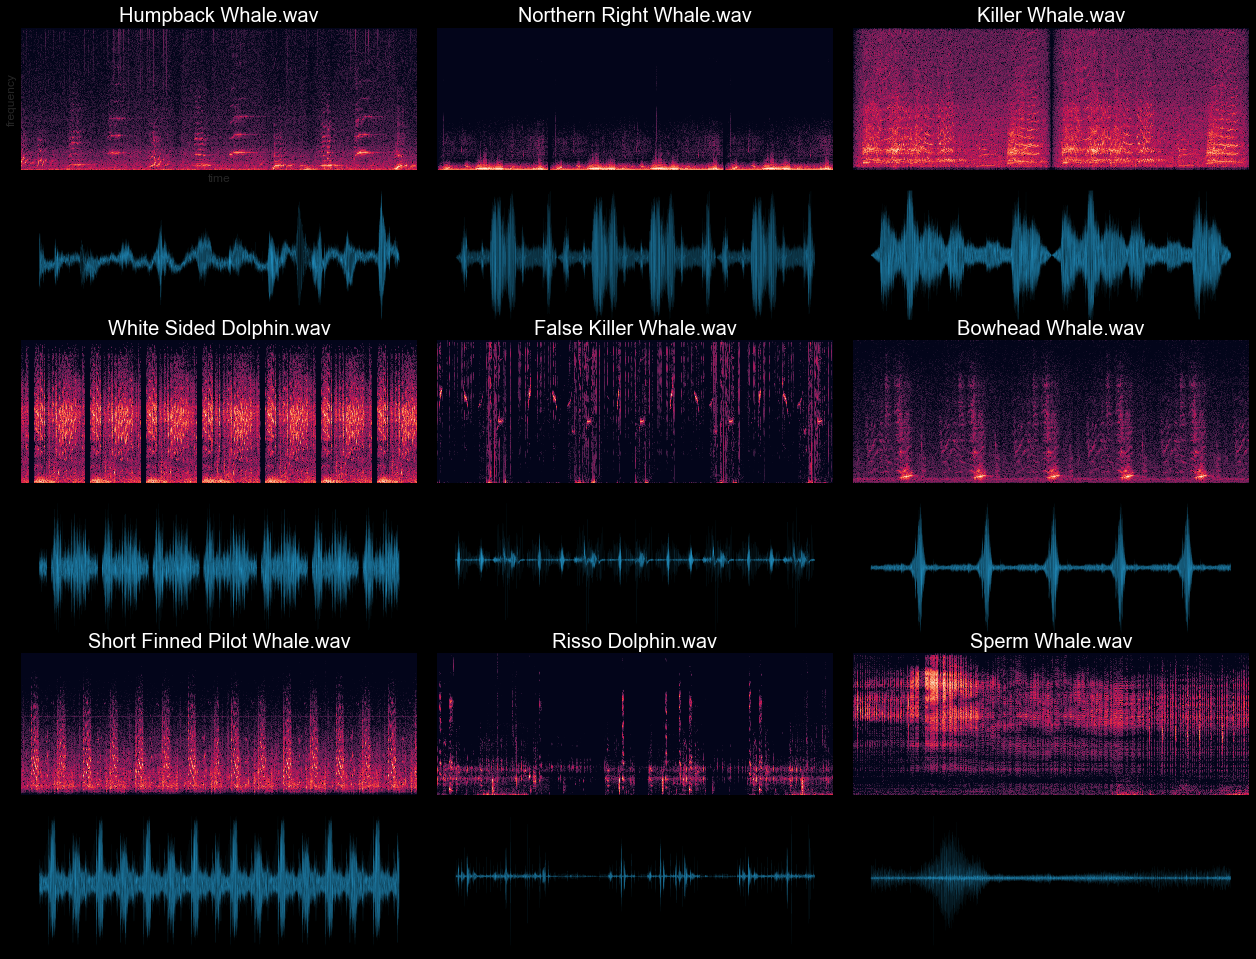

In [30]:
files = os.listdir("EDA2/")
columns=3
fig, ax = plt.subplots(int(np.ceil(len(files)/columns))*2,columns,figsize=(22,17))
# fig.suptitle("Frequency Spectrum & Oscillogram", x=0.5, y=0.91, fontsize=16)

for idx, file in enumerate(files):
    r,c = idx//columns*2, idx%columns
    rate, data = wav.read("EDA2/{}".format(file))
    f, t, Sxx = signal.spectrogram(data, fs=rate, nperseg=512, nfft=2048)
    d = 20*np.log10(Sxx+1e-10)
    ax[r,c].pcolormesh(t,f,d, vmin=-1e1,vmax=d.max())
    ax[r,c].set_title(file, fontsize=20);
    if not c and not r:
        ax[r,c].set_xlabel("time")
        ax[r,c].set_ylabel("frequency");
        ax[r,c].set_xticks([])
        ax[r,c].set_frame_on(False)
        ax[r,c].set_yticks([])
    else: ax[r,c].axis("off")
    
    norm_data = (data -data.mean())/data.std()
    ax[r+1,c].plot(norm_data,lw=0.03)
    ax[r+1,c].axis("off") 

plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig("images/Spectro_Oscilo2.png", bbox_inches='tight')